In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Problem1

### 1 a)

Implement the explicit method Forward Euler and the implicit methods Backwad Euler and Trapezoid Method without root finder.

Foward Euler's Method: $y_{n+1} = y_{n} + \delta t f(y_{n},t_{n})$.  
Backward Euler: $y_{n+1} = y_{n}+\delta t \lambda y_{n+1}$ so $y_{n+1} = \frac{y_{n}}{1-\lambda \delta t} = \left(\frac{1}{1-\lambda \delta t} \right)^{n+1}y_{0}$  
Trapezoid: $y_{n+1} = y_{n}+\frac{\lambda\delta t}{2} \left(y_{n+1}+y_{n}\right)$ so $y_{n+1} = \frac{1+\lambda \delta t/2}{1-\lambda \delta t/2}y_{n} = \left(\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right)^{n+1}y_{0}$.

In [2]:
def forward_euler1(f,dt,t0,tf,y0):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        ysol[jj] = ysol[jj-1] + dt*f(times[jj-1],ysol[jj-1])
        times[jj] = times[jj-1] + dt
    return np.array([times,ysol])

def backward_euler1(f,dt,t0,tf,y0, lamb):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        ysol[jj] = y0 * (1/(1-lamb*dt))**(jj) 
    return np.array([times,ysol])


def trapezoid_method1(f, dt, t0, tf, y0, lamb):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        ysol[jj] = y0 * ((1+lamb*dt/2)/(1-lamb*dt/2))**(jj)
    return np.array([times,ysol])


### For the problem  $\frac{dy}{dt} = \lambda y, ~ y(0) = 1, ~ 0\leq t \leq 1.$ 
<br>
Stability Conditions of methods  

The solution of the problem is stable when $Re(\lambda)\leq 0$  

* Foward Euler's Method solution is stable when $|1+\lambda\delta t|\leq 1$
* Backward Euler's Method solution is stable when $\left|\frac{1}{1-\lambda \delta t} \right|\leq 1$ or $\left|1-\lambda \delta t\right|\geq 1$
* Trapezoid Method solution is stable when $\left|\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right|\leq 1$
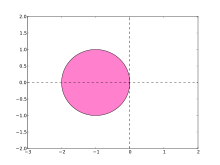 the stability region for the Foward Euler method
$\bigl\{ z \in \operatorname{C} \,\big|\, |1+z|\leq1 \bigr\}$ with $\phi(z) = 1 + z$.
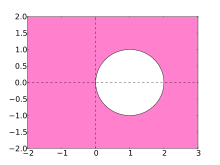 the stability region for the Backward Euler method
$\bigl\{ z \in \operatorname{C} \,\big|\, |1-z|\geq1 \bigr\}$ with $\phi(z) = 1 - z$.
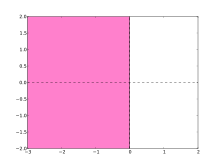 the stability region for the trapezoidal method
$\bigl\{ z \in \operatorname{C} \,\big|\, \big|\frac{1 + \frac{1}{2}z}{1 - \frac{1}{2}z}\big|\leq1 \bigr\}$ with $\phi(z) = \frac{1 + \frac{1}{2}z}{1 - \frac{1}{2}z}$.

Thus, if z is inside the stability region and the numerical results converge to zero, but if z is outside the stability region and the numerical results do not converge to zero.

### case 1: $\lambda<0$  
<br>
(1) Let $\lambda=-15$ and $\delta t = 0.2$ then $\lambda\delta t=-3$

($t0 = 0 , tf = 1 , y0 = 1$ , since $~ 0\leq t \leq 1.$ and $y(0)=1$ )  

In [3]:
t0 = 0.
tf = 1.
y0 = 1.
lamb = -15

dt = 0.2

$myf$ is function $y(t) = y_{0}e^{\lambda(t-t_{0})}$ and $de$ is function $\frac{dy}{dt} = \lambda y$

In [4]:
myf = lambda t,y: y0*np.exp(lamb*t)
de = lambda t, y: lamb*y

In [5]:
forward = forward_euler1(de, dt, t0, tf, y0)
grid = forward[0]
backward = backward_euler1(de, dt, t0, tf, y0, lamb=lamb)
trapezoid = trapezoid_method1(de, dt, t0, tf, y0, lamb=lamb)

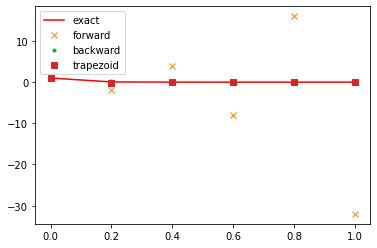

In [6]:
plt.plot(grid, myf(grid, _), "r", label="exact")
plt.plot(grid, forward[1], "C1x", label = "forward")
plt.plot(grid, backward[1], "C2.", label = "backward")
plt.plot(grid, trapezoid[1], "C3s", label = "trapezoid")
plt.legend()
plt.show()

* Foward Euler's Method   
$|1+\lambda\delta t|=|1-3|=2\gt 1$  
$\therefore$ the solution is **not stable**.
* Backward Euler's Method  
$\left|1-\lambda \delta t\right|=|1-(-3)|=4\geq 1$  
$\therefore$ the solution is **stable**.
* Trapezoid Method solution  
$\left|\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right|=|\frac{1+(-3)/2}{1-(-3)/2}|=|-\frac{3}{7}|=|-\frac{1}{5}|\leq 1$  
$\therefore$ the solution is **stable**.

(2) Let $\lambda=-1$ and $\delta t = 0.1$ then $\lambda\delta t=-0.1$

In [7]:
t0 = 0.
tf = 1.
y0 = 1.
lamb = -1

dt = 0.1

In [8]:
forward = forward_euler1(de, dt, t0, tf, y0)
grid = forward[0]
backward = backward_euler1(de, dt, t0, tf, y0, lamb=lamb)
trapezoid = trapezoid_method1(de, dt, t0, tf, y0, lamb=lamb)

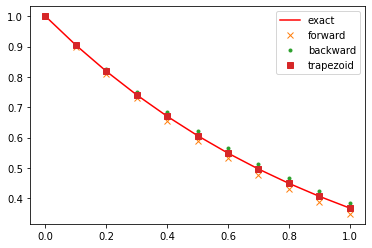

In [9]:
plt.plot(grid, myf(grid, _), "r", label="exact")
plt.plot(grid, forward[1], "C1x", label = "forward")
plt.plot(grid, backward[1], "C2.", label = "backward")
plt.plot(grid, trapezoid[1], "C3s", label = "trapezoid")
plt.legend()
plt.show()

* Foward Euler's Method   
$|1+\lambda\delta t|=|1-0.1|=0.9\leq 1$  
$\therefore$ the solution is **stable**.
* Backward Euler's Method  
$\left|1-\lambda \delta t\right|=|1-(-0.1)|=1.1\geq 1$  
$\therefore$ the solution is **stable**.
* Trapezoid Method solution  
$\left|\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right|=|\frac{1+(-0.1)/2}{1-(-0.1)/2}|=\frac{19}{21}\leq 1$  
$\therefore$ the solution is **stable**

### case 2: $\lambda>0$  
<br>
(1) Let $\lambda=4$ and $\delta t = 0.05$ then $\lambda\delta t=0.2$

In [10]:
t0 = 0.
tf = 1.
y0 = 1.
lamb = 4
dt = 0.05

In [11]:
forward = forward_euler1(de, dt, t0, tf, y0)
grid = forward[0]
backward = backward_euler1(de, dt, t0, tf, y0, lamb=lamb)
trapezoid = trapezoid_method1(de, dt, t0, tf, y0, lamb=lamb)

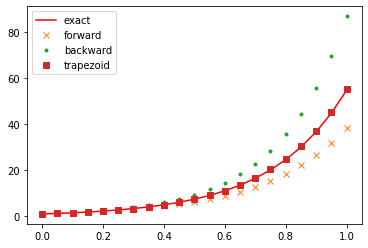

In [12]:
plt.plot(grid, myf(grid, _), "r", label="exact")
plt.plot(grid, forward[1], "C1x", label = "forward")
plt.plot(grid, backward[1], "C2.", label = "backward")
plt.plot(grid, trapezoid[1], "C3s", label = "trapezoid")
plt.legend()
plt.show()

* Foward Euler's Method   
$|1+\lambda\delta t|=|1+0.2|=1.2\gt 1$  
$\therefore$ the solution is **not stable**. 
* Backward Euler's Method  
$\left|1-\lambda \delta t\right|=|1-0.2|=0.8\lt 1$  
$\therefore$ the solution is **not stable**.
* Trapezoid Method solution 
$\left|\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right|=|\frac{1+0.2/2}{1-0.2/2}|=\frac{11}{9}\gt 1$   
$\therefore$ the solution is **not stable**. 

(2) Let $\lambda=7$ and $\delta t = 0.2$ then $\lambda\delta t=1.4$

In [13]:
t0 = 0.
tf = 1.
y0 = 1.
lamb = 7
dt = 0.2

In [14]:
forward = forward_euler1(de, dt, t0, tf, y0)
grid = forward[0]
backward = backward_euler1(de, dt, t0, tf, y0, lamb=lamb)
trapezoid = trapezoid_method1(de, dt, t0, tf, y0, lamb=lamb)

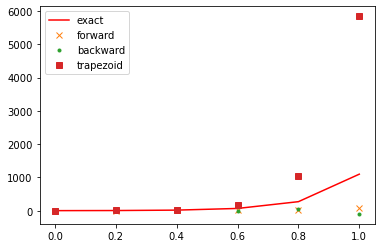

In [15]:
plt.plot(grid, myf(grid, _), "r", label="exact")
plt.plot(grid, forward[1], "C1x", label = "forward")
plt.plot(grid, backward[1], "C2.", label = "backward")
plt.plot(grid, trapezoid[1], "C3s", label = "trapezoid")
plt.legend()
plt.show()

* Foward Euler's Method   
$|1+\lambda\delta t|=|1+1.4|=2.4\gt 1$  
$\therefore$ the solution is **not stable**.
* Backward Euler's Method  
$\left|1-\lambda \delta t\right|=|1-1.4|=0.4\lt 1$  
$\therefore$ the solution is **not stable**.
* Trapezoid Method solution  
$\left|\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right|=|\frac{1+1.4/2}{1-1.4/2}|=\frac{17}{3}\gt 1$  
$\therefore$ the solution is **not stable**. 

### 1 b)

Newton method is defined for implicit methods which need a root finder in order to work.

In [16]:
def newton(f, Df, x0, epsilon, max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.
    
    Parameters
    -----------
    f : function
        Function for which we are searching for a solutoin f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number 
        Stopping criteria is abs(f(x)) < epsilon. 
    max_iter : integer
        Maximum number of iterations of Newton's method.
    h : stepsize
    Returns
    -------------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn -f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.
    ---------
    '''
    
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            # print("Found solution after", n, "iterations.")
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            # print("Zero derivative. No solution found.")
            return None
        
        xn -= fxn/Dfxn
    # print("Exceed maximum iterations. No solution found.")
    return None

* Trapezoid Method: $y_{n+1} = y_{n} + \frac{\delta t}{2}\left(f(y_{n},t_{n}) + f(y_{n+1},t_{n+1})\right)$.

In [17]:
def trapezoid_method3(f, dt, t0, tf, y0, df):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        u = lambda x: x - ysol[jj-1] -0.5*dt*(f(ysol[jj-1], times[jj-1]) + f(x, times[jj]))
        up = lambda x: 1 - 0.5*dt*df(x, times[jj])
        y_n1 = newton(u, up, ysol[jj-1]+1e3, 1e-9, 1000)
        ysol[jj] = y_n1
    return np.array([times,ysol])

### For the differential equation $\frac{dy}{dt} = \cos(y), ~ y(0) = 10, ~ 0\leq t \leq 10$
($t0 = 0 , tf = 10 , y0 = 10$ , since $~ 0\leq t \leq 10.$ and $y(0)=10$ )  
$tlist$ is varied step size of $\delta t$. 

In [18]:
t0 = 0
tf = 10
y0 = 10

tlist = [1e0, 1e-1, 1e-2, 1e-3, 1e-4]
stylelist = ['C1.', "C2x", "C3s", "C4*", "C5p"]

In [19]:
f = lambda y,t: np.cos(y)
df = lambda y,t: -np.sin(y)

Find the numerical solution changes with step sizes 1e0, 1e-1, 1e-2, 1e-3, 1e-4.

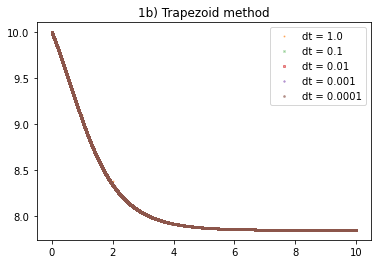

In [20]:
for t, style in zip(tlist, stylelist):
    trapezoid = trapezoid_method3(f, t, t0, tf, y0, df)
    time = trapezoid[0]
    numeric = trapezoid[1]
    plt.plot(time, numeric, style, label=f"dt = {t}", markersize=2, alpha=0.5)


plt.title("1b) Trapezoid method")
plt.legend()
plt.show()

$\delta t = (tf-t0)/N$ 
and the error bound is $E_N^T(f) = \left| \ \int_a^b f(t) \ dt - T_N(f) \ \right| \leq \frac{(tf-t0)^3}{12 N^2} K_2$
where $\left| \ f''(t) \, \right| \leq K_2$ for all $t \in [t0,tf]$.  

As the step size $\delta t$ becomes smaller, the N value is larger and the error bound $E_N^T(f)$ becomes very small.  
Therefore, the numerical solution gradually approaches the exact solution with small step size of $\delta t$.

### 1 c)

* Backward Euler's Method: $y_{n+1} = y_{n} + \delta t f(y_{n+1},t_{n+1})$.

In [21]:
def backward_euler3(f, t0, tN, y0, h, df):
    '''
    f = numerical problem
    g = exact solution
    t0 = left
    tN = right
    y0 = initial condition
    h = step size
    '''
    N = int((tN - t0)/h)
    grid = np.linspace(t0, tN, N+1)
    ygrid = np.zeros_like(grid)
    ygrid[0] = y0
    iter = np.arange(0, N+1)
    for i in range(0, iter.size-1):
        u = lambda x : x - h*f(x, grid[i+1]) - ygrid[i]
        up = lambda x: 1 - h*df(x, grid[i+1])
        y_n1 = newton(u, up, ygrid[i]+1e3, 1e-9, 1000)
        ygrid[i+1] = y_n1
    return grid, ygrid

### For the differential equation $\frac{dy}{dt} = \cos(ty), ~ y(0) = 10, ~ 0\leq t \leq 10$
($t0 = 0 , tf = 10 , y0 = 10$ , since $~ 0\leq t \leq 10.$ and $y(0)=10$ )  
$numerical$_$sol$ contains numerical solutions of three methods.  
$tlist$ is varied step size of $\delta t$. 

In [22]:
f = lambda y,t: np.cos(t*y)
df = lambda y,t: -t*np.sin(t*y)
numerical_sol = {}

In [23]:
tlist = [1e1, 1e0, 1e-1, 1e-2, 1e-3]
stylelist = ['C1.', "C2x", "C3s", "C4*", "C5p"]
methodlist = ["Forward", "Backward", "Trapezoid"]

Solve the differential equation using the Trapezoid method and save the solutions in $numerical$_$sol$

In [24]:
import time as ti

In [25]:
start=ti.time()
for t, style in zip(tlist, stylelist):
    trapezoid = trapezoid_method3(f, t, t0, tf, y0, df)
    time = trapezoid[0]
    numeric = trapezoid[1]
    numerical_sol[f"Trapezoid {t}"] = numeric
    numerical_sol[f"time {t}"] = time
end=ti.time()
print(end-start)

0.7230019569396973


Solve the differential equation using the Backward Euler and save the solutions in $numerical$_$sol$

In [26]:
start=ti.time()

for t, style in zip(tlist, stylelist):
    backward = backward_euler3(f, t0, tf, y0, t, df)
    time = backward[0]
    numeric = backward[1]
    numerical_sol[f"Backward {t}"] = numeric
end=ti.time()
print(end-start)

0.7060134410858154


Solve the differential equation using the Forward Euler and save the solutions in $numerical$_$sol$

In [27]:
start=ti.time()
for t, style in zip(tlist, stylelist):
    forward = forward_euler1(f, t, t0, tf, y0)
    time = forward[0]
    numeric = forward[1]
    numerical_sol[f"Forward {t}"] = numeric
end=ti.time()
print(end-start)

0.07698369026184082


Compare the numerical solution using three method with varied step size $\delta t$. .

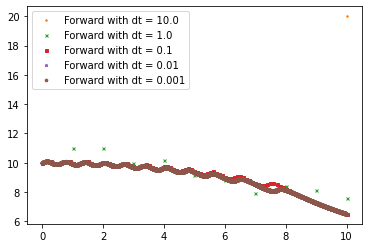

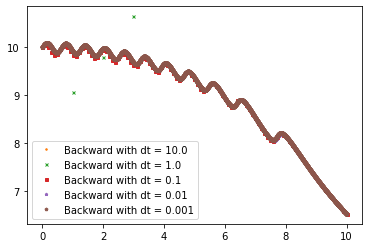

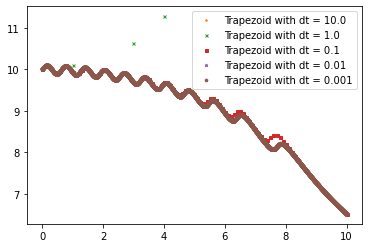

In [28]:
for method in methodlist:
    for t, style in zip(tlist, stylelist):
        plt.plot(numerical_sol[f"time {t}"],numerical_sol[f"{method} {t}"], style, label = f"{method} with dt = {t}",markersize=3)
    plt.legend()
    plt.show()

Backward Euler and Trapezoid method are more computationally intensive and take more time since those use a root finder to update the method at each time step. However, those can get away with using a much larger time step.  
Forward Euler can't get believable results with large time step $\delta t$ than Backward Euler and Trapezoid method but it take less time to solve the numerical solution.     

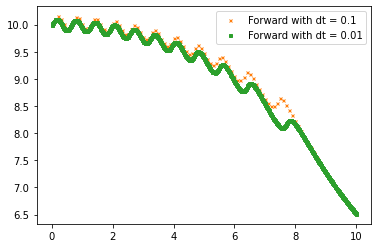

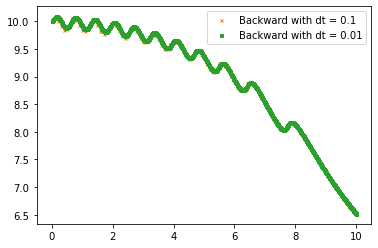

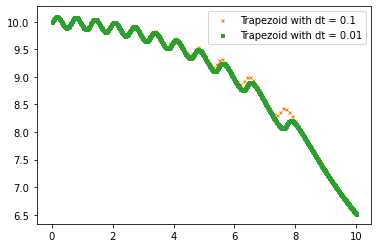

In [29]:
tlist = [1e-1, 1e-2]
stylelist = ["C1x", "C2s"]
for method in methodlist:
    for t, style in zip(tlist, stylelist):
        plt.plot(numerical_sol[f"time {t}"],numerical_sol[f"{method} {t}"], style, label = f"{method} with dt = {t}",markersize=3)
    plt.legend()
    plt.show()

Especially, we see the results $\delta t$ =0.1 vs $\delta t$ =0.01, Trapezoid method and Forward Euler are far more dramatic as we decrease the step size than for the Backward Euler method.  
Thus, Backward Euler allows for the largest time step $\delta t$ such that it takes believable results.   

# Problem 2

### a)

function $van$_ $der$_ $pol$ can get return values from euler_solver.

In [30]:
def euler_solver(dydt, u0, t, args=()):
    """
    dydt:   callable (ndarray, float) -> ndarray
    u0:     ndarray (N,)
    t:      ndarray (M,)
    ---
    returns ndarray (M, N)
    """
    t = np.asarray(t)
    u0 = np.asarray(u0)
    # Prepare grid
    grid = np.zeros((len(t), len(u0)))
    grid[0] = u0
    # Solve with grid
    for i in range(1, len(t)):
        h = t[i] - t[i - 1]
        f = np.asarray(dydt(grid[i - 1], t[i], *args))
        grid[i] = grid[i - 1] + h * f
    return grid

function $van$_ $der$_ $pol$ can get return values from rk45_solver.

In [31]:
def rk45_solver(dydt, u0, t, args=()):
    """
    dydt:   callable (ndarray, float) -> ndarray
    u0:     ndarray (N,)
    t:      ndarray (M,)
    ---
    returns ndarray (M, N)
    """
    t = np.asarray(t)
    u0 = np.asarray(u0)
    # Prepare grid
    grid = np.zeros((len(t), len(u0)))
    grid[0] = u0
    # Solve with grid
    for i in range(1, len(t)):
        h = t[i] - t[i - 1]
        f0 = grid[i - 1]
        f1 = np.asarray(dydt(f0, t[i], *args))
        f2 = np.asarray(dydt(f0 + 0.5*h*f1, t[i]+0.5*h, *args))
        f3 = np.asarray(dydt(f0 + 0.5*h*f2, t[i]+0.5*h, *args))
        f4 = np.asarray(dydt(f0 + h*f3, t[i]+h, *args))
        grid[i] = grid[i - 1] + (1/6) * h * (f1 + f4 + 2 * (f2 + f3))
    return grid

Define function $van$_ $der$_ $pol$ which takes parameters `mu`, `u0` and `t` and returns a 2D NumPy array of size `(len(t),2)` with $x$ values in the first column and $x'$ values in the second column for the solution with initial values `u0 = [x(0),x'(0)]`.

In [32]:
def van_der_pol(mu, u0, t, method='euler'):

    def func(u0, t, mu):
        x, y = u0
        dydt = [y, mu*(1-x**2)*y - x]
        return dydt

    if method == 'euler':
        solver = euler_solver
    elif method == 'rk45':
        solver = rk45_solver
    else:
        raise RuntimeError("Not valid solver name")

    # sol = odeint(func, u0, t)
    sol = solver(func, u0, t, args=(mu,))
    return sol

### b)

Plot $x$ versus $x'$ for the solution by **Euler method** and **RK45 method**.  
<br><br>
(mu=1, u0[0]=1 and u0[1]=4 since $\mu = 1$, $x(0) = 1$ and $x'(0)=4$.)

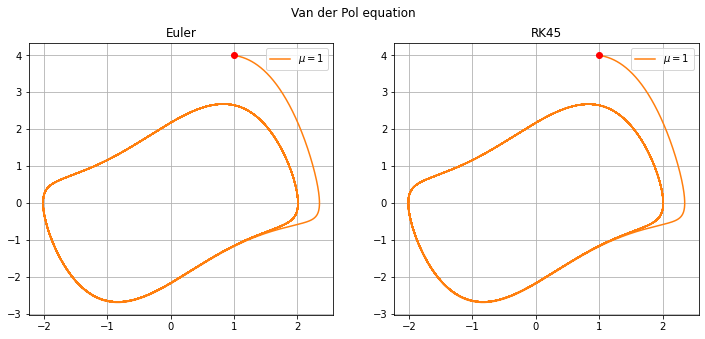

In [33]:
t = np.linspace(0, 100, 50000)
u0 = [1, 4] 

mu = 1
style = "C1"

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
methods = ['Euler', 'RK45']


for i, m in enumerate(methods):
    sol = van_der_pol(mu, u0, t, method=m.lower())
    axes[i].plot(sol[:, 0], sol[:, 1], c=style, label=f"$\mu = {mu}$")

for i, m in enumerate(methods):
    axes[i].set_title(m)
    axes[i].grid()
    axes[i].legend()
    axes[i].plot(u0[0], u0[1], 'ro')

fig.suptitle("Van der Pol equation")
plt.show(fig)

### c)

 Plot $x$ versus $x'$ for the solution by **Euler method** and **RK45 method**.
<br><br>
(mus contains mu=1,2,3,4, u0[0]=1 and u0[1]=4 since $\mu = 1,2,3,4$, $x(0) = 1$ and $x'(0)=4$.)

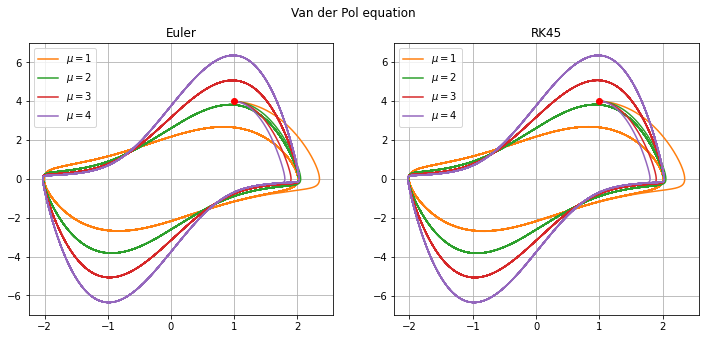

In [34]:
t = np.linspace(0, 100, 50000)
u0 = [1, 4] 
mus = [1, 2, 3, 4]
styles = ["C1", "C2", "C3", "C4"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
methods = ['Euler', 'RK45']

for mu, style in zip(mus, styles):
    for i, m in enumerate(methods):
        sol = van_der_pol(mu, u0, t, method=m.lower())
        axes[i].plot(sol[:, 0], sol[:, 1], c=style, label=f"$\mu = {mu}$")

for i, m in enumerate(methods):
    axes[i].set_title(m)
    axes[i].grid()
    axes[i].legend()
    axes[i].plot(u0[0], u0[1], 'ro')

fig.suptitle("Van der Pol equation")
plt.show(fig)